In [1]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from keras import Input

# Settings
DATA_DIR = "generated_datasets"
RESULTS_DIR = "results_lstm_streaming"
os.makedirs(RESULTS_DIR, exist_ok=True)

SUBSEQ_LEN = 20
BATCH_SIZE = 300
CONTAMINATION = 0.05
EPOCHS = 10

In [2]:
def create_lstm_autoencoder(seq_len):
    model = Sequential([
        Input(shape=(seq_len, 1)),
        LSTM(64, activation='relu', return_sequences=False),
        RepeatVector(seq_len),
        LSTM(64, activation='relu', return_sequences=True),
        TimeDistributed(Dense(1))
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def to_windows(ts, window_size):
    return np.array([ts[i:i+window_size] for i in range(len(ts) - window_size)])

def run_lstm_streaming(ts):
    preds, scores = [], []
    for start in range(0, len(ts) - BATCH_SIZE, BATCH_SIZE):
        batch = ts[start:start + BATCH_SIZE]
        if len(batch) < BATCH_SIZE:
            break

        windows = to_windows(batch, SUBSEQ_LEN)
        if len(windows) < 1:
            continue

        windows = windows[..., np.newaxis]  # shape: (samples, timesteps, 1)

        model = create_lstm_autoencoder(SUBSEQ_LEN)
        model.fit(windows, windows, epochs=EPOCHS, verbose=0, batch_size=32)

        recon = model.predict(windows)
        errors = np.mean((windows - recon) ** 2, axis=(1, 2))

        score_padded = np.zeros(len(batch))
        score_padded[SUBSEQ_LEN:] = errors

        threshold = np.percentile(errors, 100 * (1 - CONTAMINATION))
        batch_preds = (score_padded > threshold).astype(int)

        preds.extend(batch_preds)
        scores.extend(score_padded)

    return np.array(preds), np.array(scores)


Processing normality_1_daphnet.npy
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/ste

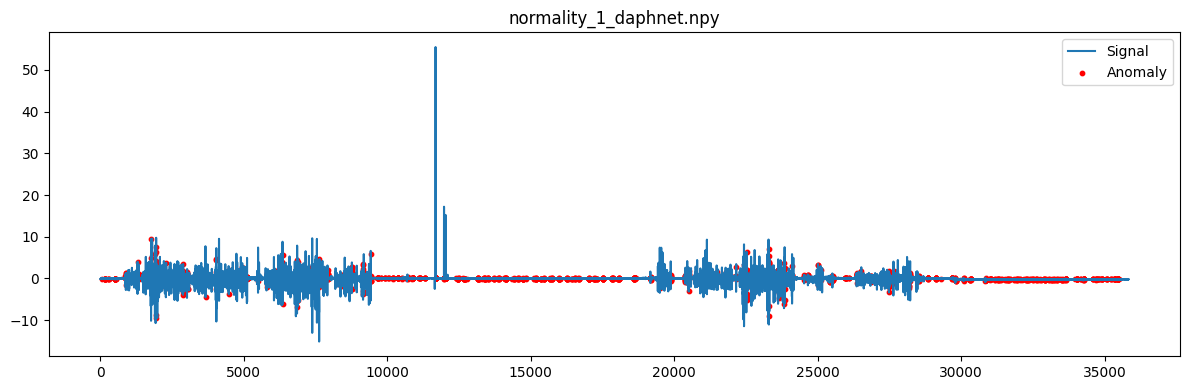


Processing normality_1_genesis.npy
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 403ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 

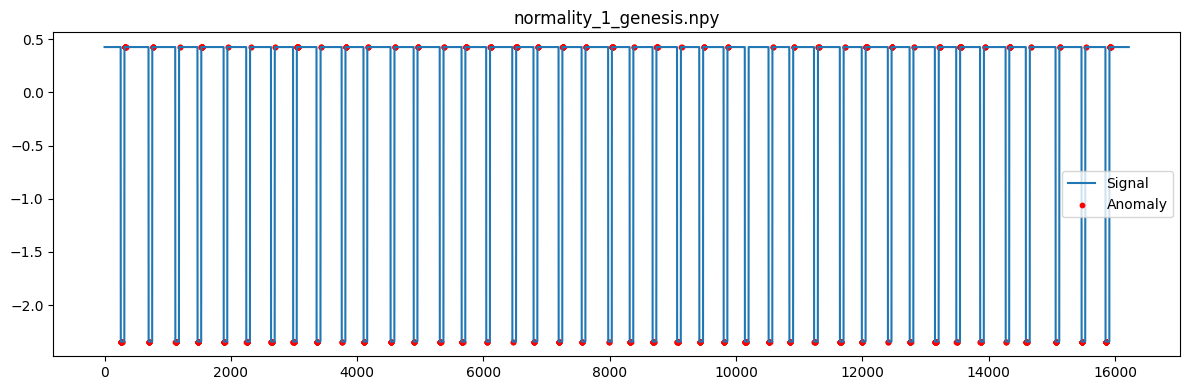


Processing normality_1_nasa-msl.npy
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
Precision: 0.055, Recall: 0.051, F1: 0.053, AUC: 0.489


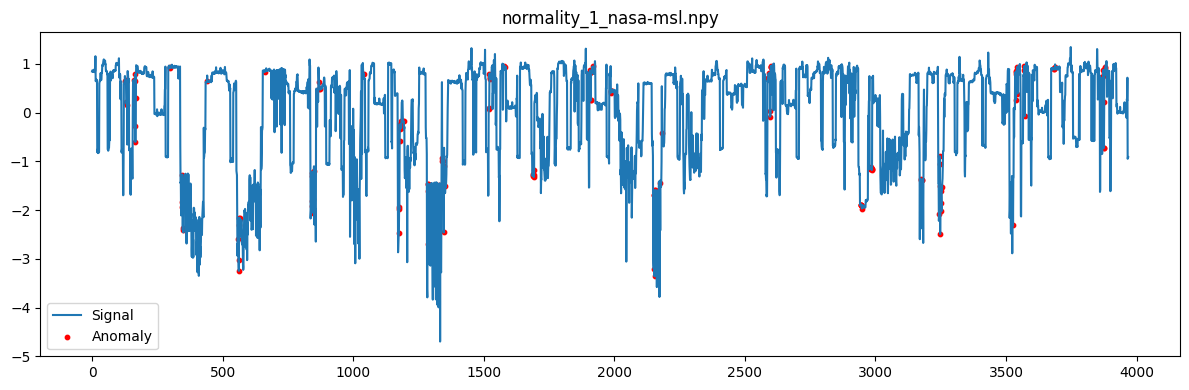


Processing normality_2_1_daphnet_genesis.npy
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
9/9 ━━━━━━━━━━━━━━━

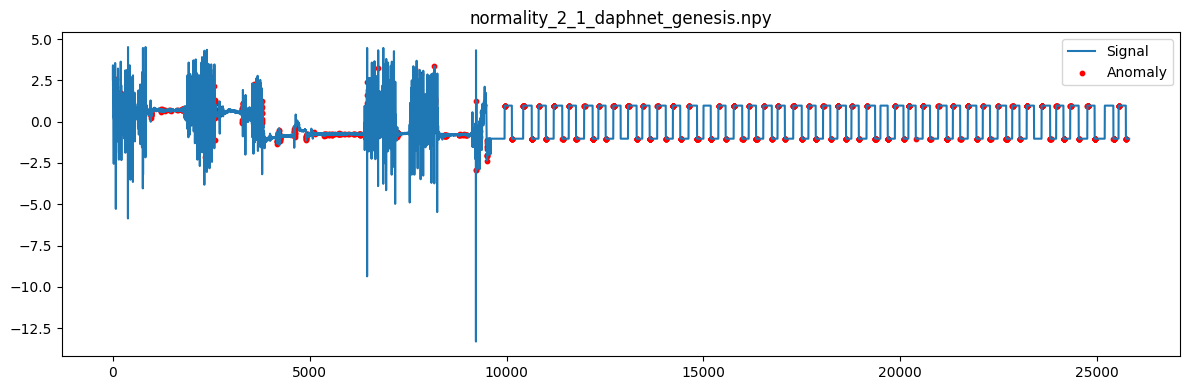


Processing normality_2_2_daphnet_nasa-msl.npy
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step
9/9 ━━━━━━━━━━━━━

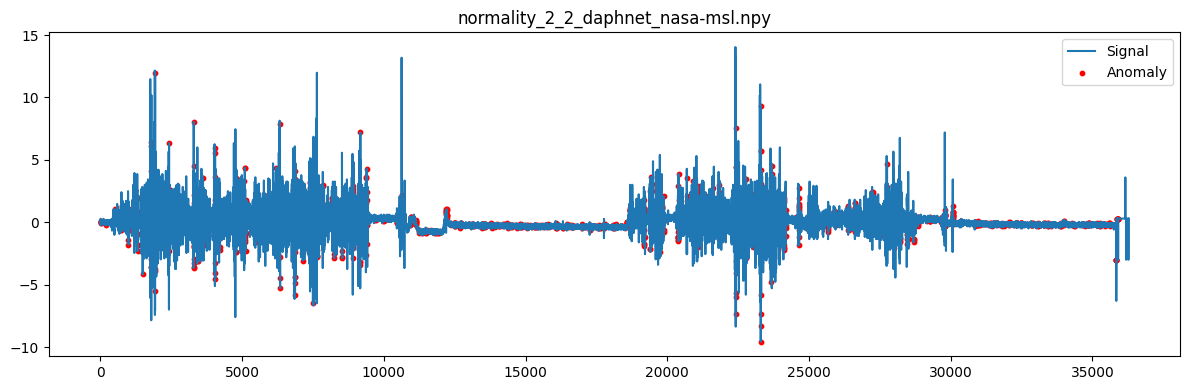


Processing normality_2_3_genesis_nasa-msl.npy
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step
9/9 ━━━━━━━━━━━━━

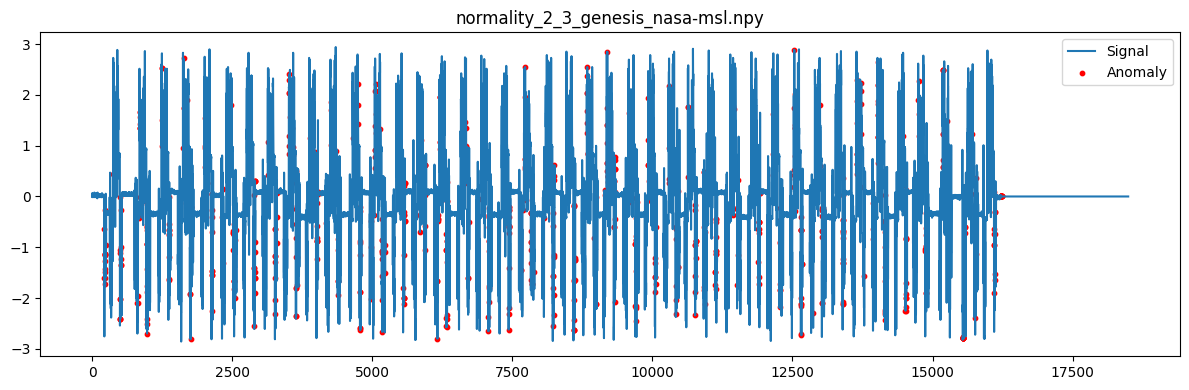


Processing normality_3_1_daphnet_genesis_nasa-msl.npy
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
9/9 ━━━━━

In [ ]:
summary = []

for fname in sorted(os.listdir(DATA_DIR)):
    if not fname.endswith(".npy") or "_boundaries" in fname:
        continue

    print(f"\nProcessing {fname}")
    ts = np.load(os.path.join(DATA_DIR, fname))
    preds, scores = run_lstm_streaming(ts)

    if len(preds) == 0:
        print("Skipped: No predictions")
        continue

    labels = np.zeros(len(scores))
    labels[-int(len(scores) * CONTAMINATION):] = 1

    p = precision_score(labels, preds, zero_division=0)
    r = recall_score(labels, preds, zero_division=0)
    f = f1_score(labels, preds, zero_division=0)
    a = roc_auc_score(labels, scores) if len(set(labels)) > 1 else 0.0

    print(f"Precision: {p:.3f}, Recall: {r:.3f}, F1: {f:.3f}, AUC: {a:.3f}")

    plt.figure(figsize=(12, 4))
    plt.plot(ts, label="Signal")
    idxs = np.where(preds == 1)[0]
    plt.scatter(idxs, ts[idxs], color='red', s=10, label="Anomaly")
    plt.title(fname)
    plt.legend()
    plt.tight_layout()
    plt.show()

    summary.append(dict(dataset=fname, length=len(ts), precision=round(p, 3),
                        recall=round(r, 3), f1=round(f, 3), auc=round(a, 3)))


In [2]:
if summary:
    df = pd.DataFrame(summary).set_index("dataset")
    display(df)
    df.to_csv(os.path.join(RESULTS_DIR, "lstm_streaming_variant1.csv"))
else:
    print("No datasets were successfully processed.")


NameError: name 'summary' is not defined